In [1]:
import pandas as pd

In [2]:
data_path = '/content/'

In [5]:
# Load all CSVs

aisles = pd.read_csv(data_path + 'aisles.csv')
departments = pd.read_csv(data_path + 'departments.csv')
order_products_prior = pd.read_csv(data_path + 'order_products__prior.csv')
order_products_train = pd.read_csv(data_path + 'order_products__train.csv')
orders = pd.read_csv(data_path + 'orders.csv')
products = pd.read_csv(data_path + 'products.csv')

In [6]:
# Show shape (rows, cols)

print("aisles:", aisles.shape)
print("departments:", departments.shape)
print("order_products_prior:", order_products_prior.shape)
print("order_products_train:", order_products_train.shape)
print("orders:", orders.shape)
print("products:", products.shape)

aisles: (134, 2)
departments: (21, 2)
order_products_prior: (851644, 4)
order_products_train: (833755, 4)
orders: (473473, 7)
products: (49688, 4)


In [7]:
# Show first few rows from each file

print("\nSample from aisles:")
display(aisles.head())

print("\nSample from departments:")
display(departments.head())

print("\nSample from products:")
display(products.head())

print("\nSample from orders:")
display(orders.head())

print("\nSample from order_products_prior:")
display(order_products_prior.head())

print("\nSample from order_products_train:")
display(order_products_train.head())


Sample from aisles:


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation



Sample from departments:


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol



Sample from products:


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13



Sample from orders:


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1.0,2.0,8.0,NaN
1,2398795,1,prior,2.0,3.0,7.0,15.0
2,473747,1,prior,3.0,3.0,12.0,21.0
3,2254736,1,prior,4.0,4.0,7.0,29.0
4,431534,1,prior,5.0,4.0,15.0,28.0



Sample from order_products_prior:


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1.0,1.0
1,2,28985,2.0,1.0
2,2,9327,3.0,0.0
3,2,45918,4.0,1.0
4,2,30035,5.0,0.0



Sample from order_products_train:


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1.0
1,1,11109,2,1.0
2,1,10246,3,0.0
3,1,49683,4,0.0
4,1,43633,5,1.0


In [8]:
# Merge products with aisles and departments to get full product info

products_full = products.merge(aisles, on='aisle_id', how='left')
products_full = products_full.merge(departments, on='department_id', how='left')

print("✅ Merged products data shape:", products_full.shape)
display(products_full.head())

✅ Merged products data shape: (49688, 6)


,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [9]:
# Merge order_products_prior with products info
order_details = order_products_prior.merge(products_full, on='product_id', how='left')

# Merge with orders to add user and order info
full_data = order_details.merge(orders, on='order_id', how='left')

print("\n✅ Final combined data shape:", full_data.shape)
display(full_data.head())


✅ Final combined data shape: (851644, 15)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1.0,1.0,Organic Egg Whites,86,16,eggs,dairy eggs,NaN,NaN,NaN,NaN,NaN,NaN
1,2,28985,2.0,1.0,Michigan Organic Kale,83,4,fresh vegetables,produce,NaN,NaN,NaN,NaN,NaN,NaN
2,2,9327,3.0,0.0,Garlic Powder,104,13,spices seasonings,pantry,NaN,NaN,NaN,NaN,NaN,NaN
3,2,45918,4.0,1.0,Coconut Butter,19,13,oils vinegars,pantry,NaN,NaN,NaN,NaN,NaN,NaN
4,2,30035,5.0,0.0,Natural Sweetener,17,13,baking ingredients,pantry,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Basic info
print("Rows:", full_data.shape[0])
print("Columns:", full_data.shape[1])
print("\nColumn names:\n", full_data.columns.tolist())

Rows: 851644
Columns: 15

Column names:
 ['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'aisle', 'department', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']


In [11]:
# Check for missing values
print("\nMissing values per column:")
print(full_data.isnull().sum())


Missing values per column:
order_id                       0
product_id                     0
add_to_cart_order              1
reordered                      1
product_name                   0
aisle_id                       0
department_id                  0
aisle                          0
department                     0
user_id                   732843
eval_set                  732843
order_number              732843
order_dow                 732843
order_hour_of_day         732843
days_since_prior_order    740385
dtype: int64


In [12]:
# Check unique users and products
print("\nUnique users:", full_data['user_id'].nunique())
print("Unique products:", full_data['product_id'].nunique())


Unique users: 8333
Unique products: 33744


In [13]:
# Top 10 most ordered products
top_products = full_data['product_name'].value_counts().head(10)
print("\nTop 10 most ordered products:")
print(top_products)


Top 10 most ordered products:
product_name
Banana                    12603
Bag of Organic Bananas    10141
Organic Strawberries       6995
Organic Baby Spinach       6375
Organic Hass Avocado       5620
Organic Avocado            4577
Large Lemon                4027
Strawberries               3738
Limes                      3654
Organic Raspberries        3601
Name: count, dtype: int64


In [14]:
# Orders by department
dept_orders = full_data['department'].value_counts().head(10)
print("\nOrders by department:")
print(dept_orders)


Orders by department:
department
produce            248825
dairy eggs         142458
snacks              75995
beverages           70829
frozen              58660
pantry              48787
bakery              30936
canned goods        27937
deli                27670
dry goods pasta     22391
Name: count, dtype: int64


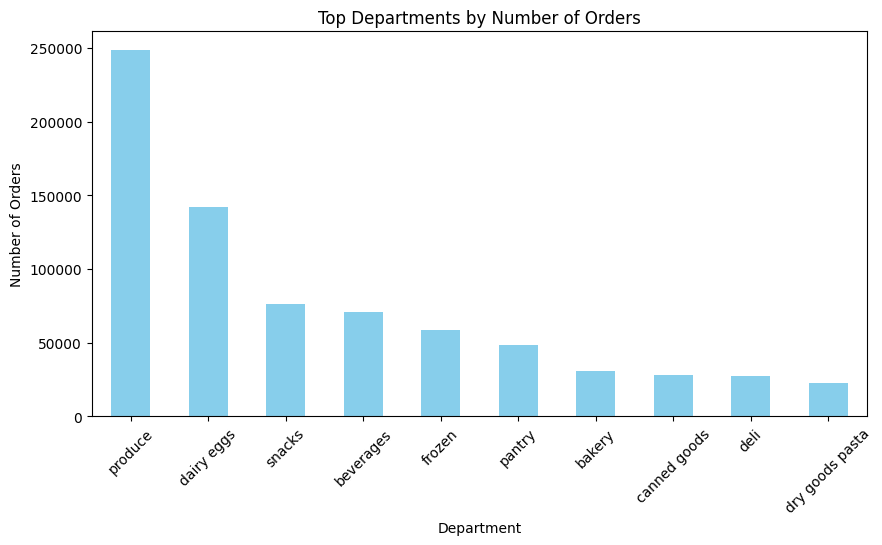

In [15]:
# Plot popular departments
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
dept_orders.plot(kind='bar', color='skyblue')
plt.title('Top Departments by Number of Orders')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

In [16]:
# We'll use only necessary columns
basket_data = full_data[['order_id', 'product_name']]

In [17]:
# Drop missing values (if any)
basket_data.dropna(subset=['product_name'], inplace=True)

/tmp/ipython-input-2453169935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basket_data.dropna(subset=['product_name'], inplace=True)


In [18]:
print("Basket data ready:")
display(basket_data.head())

Basket data ready:


,order_id,product_name
0,2,Organic Egg Whites
1,2,Michigan Organic Kale
2,2,Garlic Powder
3,2,Coconut Butter
4,2,Natural Sweetener


In [19]:
# Group products by order_id
basket = (basket_data.groupby(['order_id'])['product_name']
          .apply(list)
          .reset_index())

In [20]:
print("\nEach order with its product list:")
display(basket.head())


Each order with its product list:


,order_id,product_name
0,2,"[Organic Egg Whites, Michigan Organic Kale, Ga..."
1,3,[Total 2% with Strawberry Lowfat Greek Straine...
2,4,"[Plain Pre-Sliced Bagels, Honey/Lemon Cough Dr..."
3,5,"[Bag of Organic Bananas, Just Crisp, Parmesan,..."
4,6,"[Cleanse, Dryer Sheets Geranium Scent, Clean D..."


In [21]:
!pip install mlxtend

In [22]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [23]:
# Convert list of lists into encoded dataframe
te = TransactionEncoder()
te_ary = te.fit(basket['product_name']).transform(basket['product_name'])
basket_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print("✅ Encoded basket shape:", basket_encoded.shape)
display(basket_encoded.head())

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

✅ Encoded basket shape: (84748, 33744)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,#2 Coffee Filters,#2 Cone White Coffee Filters,#4 Natural Brown Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,+Energy Black Cherry Vegetable & Fruit Juice,0 Calorie Acai Raspberry Water Beverage,0 Calorie Fuji Apple Pear Water Beverage,0 Calorie Strawberry Dragonfruit Water Beverage,0% Fat Black Cherry Greek Yogurt y,0% Fat Blueberry Greek Yogurt,...,with Sweet & Smoky BBQ Sauce Cheeseburger Sliders,with Twist Ties Sandwich & Storage Bags,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,with a Splash of Mango Coconut Water,with a Splash of Pineapple Coconut Water
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [24]:
frequent_itemsets = apriori(basket_encoded, min_support=0.01, use_colnames=True)

# Sort by support (frequency)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

print("✅ Frequent itemsets:")
display(frequent_itemsets.head(10))


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

✅ Frequent itemsets:


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,support,itemsets
6,0.148711,(Banana)
5,0.119661,(Bag of Organic Bananas)
75,0.082539,(Organic Strawberries)
37,0.075223,(Organic Baby Spinach)
57,0.066314,(Organic Hass Avocado)
33,0.054007,(Organic Avocado)
28,0.047517,(Large Lemon)
97,0.044107,(Strawberries)
30,0.043116,(Limes)
66,0.042491,(Organic Raspberries)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [25]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by='lift', ascending=False)

print("✅ Association rules (Top 10):")
display(rules.head(10))


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

✅ Association rules (Top 10):


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
30,(Organic Raspberries),(Organic Strawberries),0.042491,0.082539,0.010030,0.236046,2.859812,1.0,0.006523,1.200937,0.679186,0.087215,0.167317,0.178780
31,(Organic Strawberries),(Organic Raspberries),0.082539,0.042491,0.010030,0.121515,2.859812,1.0,0.006523,1.089956,0.708833,0.087215,0.082532,0.178780
15,(Organic Raspberries),(Bag of Organic Bananas),0.042491,0.119661,0.012814,0.301583,2.520318,1.0,0.007730,1.260478,0.629994,0.085809,0.206650,0.204336
14,(Bag of Organic Bananas),(Organic Raspberries),0.119661,0.042491,0.012814,0.107090,2.520318,1.0,0.007730,1.072347,0.685218,0.085809,0.067466,0.204336
27,(Organic Fuji Apple),(Banana),0.027517,0.148711,0.010254,0.372642,2.505802,1.0,0.006162,1.356941,0.617930,0.061780,0.263048,0.220797
26,(Banana),(Organic Fuji Apple),0.148711,0.027517,0.010254,0.068952,2.505802,1.0,0.006162,1.044504,0.705902,0.061780,0.042607,0.220797
0,(Bag of Organic Bananas),(Organic Hass Avocado),0.119661,0.066314,0.019351,0.161720,2.438688,1.0,0.011416,1.113811,0.670132,0.116139,0.102182,0.226767
1,(Organic Hass Avocado),(Bag of Organic Bananas),0.066314,0.119661,0.019351,0.291815,2.438688,1.0,0.011416,1.243092,0.631844,0.116139,0.195554,0.226767
18,(Organic Hass Avocado),(Organic Strawberries),0.066314,0.082539,0.012390,0.186833,2.263574,1.0,0.006916,1.128256,0.597868,0.090791,0.113677,0.168470
19,(Organic Strawberries),(Organic Hass Avocado),0.082539,0.066314,0.012390,0.150107,2.263574,1.0,0.006916,1.098592,0.608441,0.090791,0.089744,0.168470


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

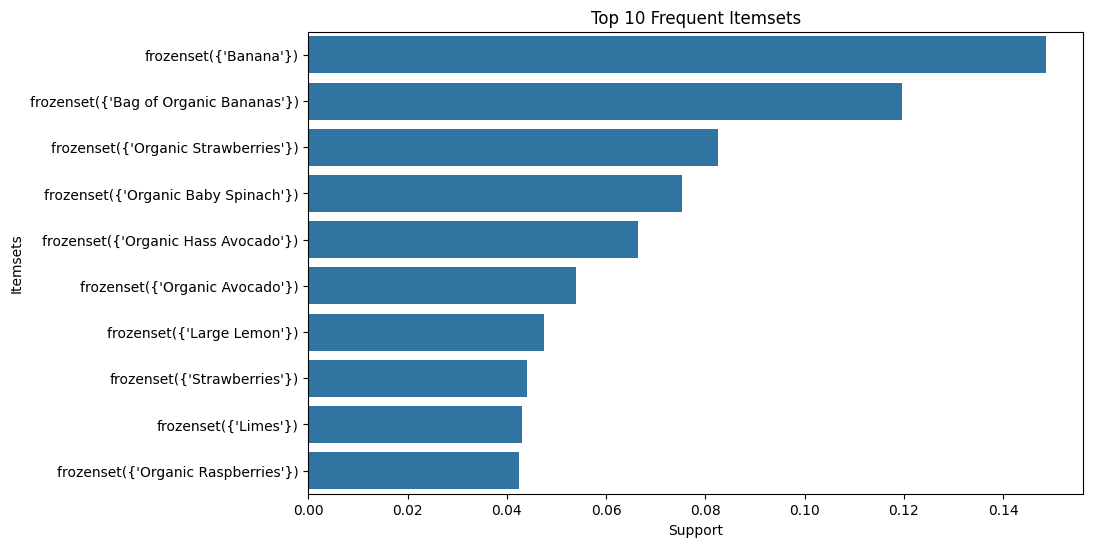

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [27]:
# Top 10 frequent itemsets by support
plt.figure(figsize=(10,6))
top_itemsets = frequent_itemsets.nlargest(10, 'support')
sns.barplot(x='support', y=top_itemsets['itemsets'].astype(str), data=top_itemsets)
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

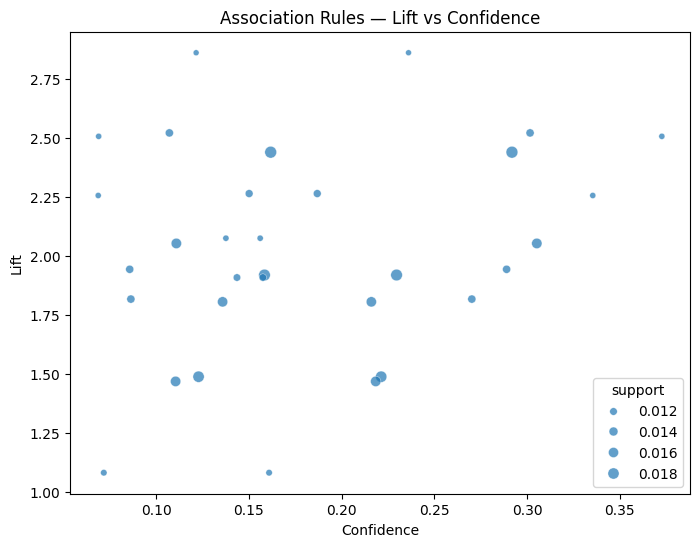

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [28]:
# Visualize association rules (lift vs confidence)
plt.figure(figsize=(8,6))
sns.scatterplot(data=rules, x='confidence', y='lift', size='support', alpha=0.7)
plt.title('Association Rules — Lift vs Confidence')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.show()

In [29]:
# Show top 10 “strongest” rules
print("Top 10 Strongest Rules:\n")
display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Top 10 Strongest Rules:



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,support,confidence,lift
30,(Organic Raspberries),(Organic Strawberries),0.010030,0.236046,2.859812
31,(Organic Strawberries),(Organic Raspberries),0.010030,0.121515,2.859812
15,(Organic Raspberries),(Bag of Organic Bananas),0.012814,0.301583,2.520318
14,(Bag of Organic Bananas),(Organic Raspberries),0.012814,0.107090,2.520318
27,(Organic Fuji Apple),(Banana),0.010254,0.372642,2.505802
26,(Banana),(Organic Fuji Apple),0.010254,0.068952,2.505802
0,(Bag of Organic Bananas),(Organic Hass Avocado),0.019351,0.161720,2.438688
1,(Organic Hass Avocado),(Bag of Organic Bananas),0.019351,0.291815,2.438688
18,(Organic Hass Avocado),(Organic Strawberries),0.012390,0.186833,2.263574
19,(Organic Strawberries),(Organic Hass Avocado),0.012390,0.150107,2.263574


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [30]:
rules.to_csv("association_rules.csv", index=False)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [31]:
from google.colab import files
files.download("association_rules.csv")


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag